# Iris Data Set Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.data',names=['sepal length','sepal width','petal length','petal width','class'])

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
data['sepal length'] = data['sepal length'].astype('float')

In [7]:
data['sepal width'] = data['sepal width'].astype('float')
data['petal length'] = data['petal length'].astype('float')
data['petal width'] = data['petal width'].astype('float')

In [8]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\SEXY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


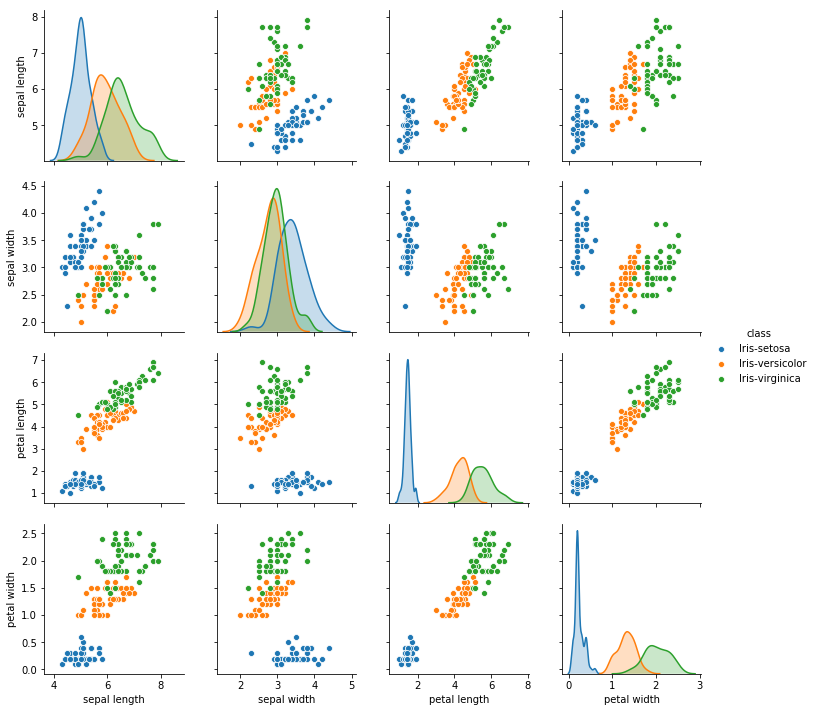

In [9]:
sns.pairplot(data,diag_kind='kde',hue='class')
plt.show()

In [10]:
df = data.drop('class',axis=1)

In [11]:
#Kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
from scipy.stats import zscore

In [13]:
df_zscore = df.apply(zscore)

In [14]:
df_zscore.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [15]:
cluster_range = range(1,15)
cluster_errors = []
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(df_zscore)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({"num_clusters":cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.682216
4,5,91.127640
5,6,80.230607
6,7,71.940758
7,8,63.190090
8,9,54.893759
9,10,47.745561


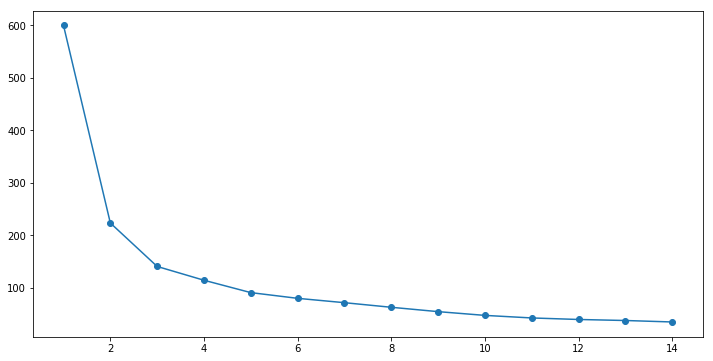

In [16]:
# Elbow Plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

In [17]:
for i in range(13):
    print(clusters_df['cluster_errors'][i] - clusters_df['cluster_errors'][i+1])

376.2679942632366
82.76618910601647
26.283600531367313
23.55457631952791
10.897032734782186
8.289849525991002
8.750667785490577
8.29633075494555
7.148198375838469
4.882366717984269
2.905255354681188
1.9579950580614138
2.796137007577265


In [18]:
#clusters will be three because the inertia start to get stagnating after 3
kmeans = KMeans(n_clusters=3, n_init=15,random_state=2)

In [19]:
kmeans.fit(df_zscore)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [20]:
centroids = kmeans.cluster_centers_

In [21]:
centroids

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [22]:
centroid_df = pd.DataFrame(centroids , columns=list(df_zscore))

In [23]:
centroid_df

,sepal length,sepal width,petal length,petal width
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


In [24]:
labels = kmeans.labels_

In [25]:
df_label = pd.DataFrame(labels)

In [26]:
df_label.head(2)

,0
0,1
1,1


In [27]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [28]:
df = df.join(df_label)

In [29]:
df.head()

,sepal length,sepal width,petal length,petal width,0
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:
df[0].value_counts()

2    53
1    50
0    47
Name: 0, dtype: int64

In [31]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of kmeans clustering')

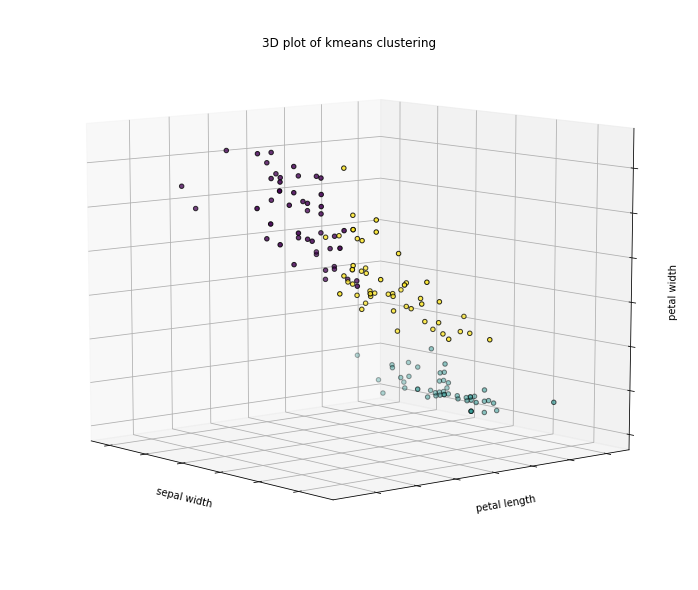

In [32]:
fig =plt.figure(figsize=(10,8))
ax = Axes3D(fig,rect=[0,0,.95,1],elev=10,azim=140)
kmeans.fit(df_zscore)
labels=kmeans.labels_
ax.scatter(df_zscore.iloc[:,1] ,df_zscore.iloc[:,2], df_zscore.iloc[:,3], c=labels.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('sepal width')
ax.set_ylabel('petal length')
ax.set_zlabel('petal width')
ax.set_title('3D plot of kmeans clustering')

# Agglomerative Heirarchial clustering

In [33]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [34]:
z = linkage(df_zscore,'average')
c, coph_distance = cophenet(z,pdist(df_zscore))

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
z1 = linkage(df_zscore,'centroid')
c1, coph_distance = cophenet(z1,pdist(df_zscore))
c1

0.852775281236247

In [37]:
z2 = linkage(df_zscore,'average')
c2, coph_distance = cophenet(z2,pdist(df_zscore))
c2

0.8532224412681922

In [38]:
z3 = linkage(df_zscore,'single')
c3, coph_distance = cophenet(z3,pdist(df_zscore))
c3

0.8280881760287518

In [39]:
z4 = linkage(df_zscore,'complete')
c4, coph_distance = cophenet(z4,pdist(df_zscore))
c4

0.7512273718088645

In [40]:
z5 = linkage(df_zscore,'ward')
c5, coph_distance = cophenet(z5,pdist(df_zscore))
c5

0.8225754331448963

In [41]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [42]:
model.fit(df_zscore)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [43]:
label_agg = model.labels_

In [44]:
df_labels_agg = pd.DataFrame(label_agg)

In [45]:
df_labels_agg.head(2)

,0
0,1
1,1


In [46]:
df_agg = data.drop('class',axis=1)

In [47]:
df_agg.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df_agg = df_agg.join(df_labels_agg)

In [49]:
df_agg[0].value_counts()

0    71
1    49
2    30
Name: 0, dtype: int64

In [50]:
#model2 using centroid linkage
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

In [51]:
model2.fit(df_zscore)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [52]:
label_agg2 = model2.labels_

In [53]:
df_labels_agg2 = pd.DataFrame(label_agg2)

In [54]:
df_agg2 = data.drop('class',axis=1)

In [55]:
df_agg2 = df_agg2.join(df_labels_agg2)

In [56]:
df_agg2[0].value_counts()

0    100
1     49
2      1
Name: 0, dtype: int64

In [57]:
#calculation of inertia for comparison of kmeans and agglomerative hierarchial clustering
kmeans.inertia_

140.96581663074699

# KMeans Clustering is suitable for this data set.